In [1]:
#from keras.datasets import imdb


C:\Users\Dan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
#import keras.datasets as kds

In [61]:
#CIFAR10 = kds.cifar10

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

C:\Users\Dan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : [3]')

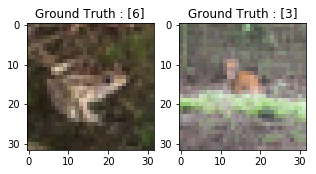

In [4]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[22,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[32,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

In [5]:
x_train = x_train.reshape(-3, 32,32, 3)
x_test = x_test.reshape(-3, 32,32, 3)
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.
x_test = x_test / 255.

In [7]:
# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])

Original label: [6]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
from sklearn.model_selection import train_test_split
x_train,valid_X,train_label,valid_label = train_test_split(x_train, y_train_one_hot, test_size=0.2, random_state=13)

In [9]:
x_train.shape,valid_X.shape,train_label.shape,valid_label.shape


((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [10]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import ELU

In [27]:
batch_size = 64
epochs = 10
num_classes = 10

In [43]:
ColorImag_model = Sequential()
ColorImag_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
ColorImag_model.add(LeakyReLU(alpha=0.1))
#ColorImag_model.add(ELU(alpha=1.0))
ColorImag_model.add(MaxPooling2D((2, 2),padding='same'))
ColorImag_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
ColorImag_model.add(LeakyReLU(alpha=0.1))
#ColorImag_model.add(ELU(alpha=1.0))
ColorImag_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
ColorImag_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
ColorImag_model.add(LeakyReLU(alpha=0.1)) 
#ColorImag_model.add(ELU(alpha=1.0))
ColorImag_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
ColorImag_model.add(Flatten())
ColorImag_model.add(Dense(128, activation='linear'))
ColorImag_model.add(LeakyReLU(alpha=0.1))
#ColorImag_model.add(ELU(alpha=1.0))
ColorImag_model.add(Dense(num_classes, activation='softmax'))

In [44]:
ColorImag_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [45]:
ColorImag_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 128)         73856     
__________

In [48]:
ColorImag_train = ColorImag_model.fit(x_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 134s - loss: 1.4392 - acc: 0.4819 - val_loss: 1.0737 - val_acc: 0.6236
Epoch 2/10
40000/40000 [==============================] - 154s - loss: 0.9764 - acc: 0.6557 - val_loss: 0.9336 - val_acc: 0.6776
Epoch 3/10
40000/40000 [==============================] - 137s - loss: 0.8002 - acc: 0.7195 - val_loss: 0.8743 - val_acc: 0.6999
Epoch 4/10
40000/40000 [==============================] - 146s - loss: 0.6749 - acc: 0.7628 - val_loss: 0.8114 - val_acc: 0.7238
Epoch 5/10
40000/40000 [==============================] - 136s - loss: 0.5688 - acc: 0.8007 - val_loss: 0.7740 - val_acc: 0.7376
Epoch 6/10
40000/40000 [==============================] - 141s - loss: 0.4691 - acc: 0.8374 - val_loss: 0.7729 - val_acc: 0.7486
Epoch 7/10
40000/40000 [==============================] - 160s - loss: 0.3864 - acc: 0.8642 - val_loss: 0.8291 - val_acc: 0.7444
Epoch 8/10
40000/40000 [=======================

In [49]:
test_eval = ColorImag_model.evaluate(x_test, y_test_one_hot, verbose=0)

In [50]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.0556053639411926
Test accuracy: 0.739


AttributeError: 'Sequential' object has no attribute 'history'

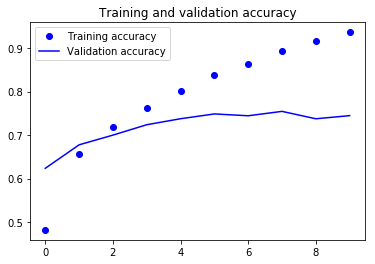

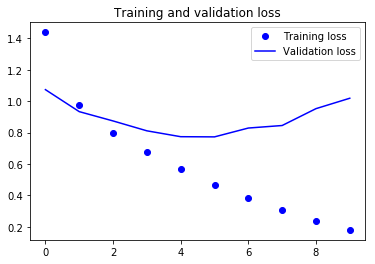

In [51]:


accuracy = ColorImag_train.history['acc']
val_accuracy = ColorImag_train.history['val_acc']
loss = ColorImag_train.history['loss']
val_loss = ColorImag_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [62]:
batch_size = 64
epochs = 10
num_classes = 10

In [63]:
ColorImag_model = Sequential()
ColorImag_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(32,32,3)))
ColorImag_model.add(LeakyReLU(alpha=0.1))
ColorImag_model.add(MaxPooling2D((2, 2),padding='same'))
ColorImag_model.add(Dropout(0.25))
ColorImag_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
ColorImag_model.add(LeakyReLU(alpha=0.1))
ColorImag_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
ColorImag_model.add(Dropout(0.25))
ColorImag_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
ColorImag_model.add(LeakyReLU(alpha=0.1))                  
ColorImag_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
ColorImag_model.add(Dropout(0.4))
ColorImag_model.add(Flatten())
ColorImag_model.add(Dense(128, activation='linear'))
ColorImag_model.add(LeakyReLU(alpha=0.1))           
ColorImag_model.add(Dropout(0.3))
ColorImag_model.add(Dense(num_classes, activation='softmax'))

In [64]:
ColorImag_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
__________

In [65]:
ColorImag_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [66]:
ColorImag_model_dropout = ColorImag_model.fit(x_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 163s - loss: 1.6606 - acc: 0.3943 - val_loss: 1.3023 - val_acc: 0.5254
Epoch 2/10
40000/40000 [==============================] - 144s - loss: 1.2373 - acc: 0.5577 - val_loss: 1.0212 - val_acc: 0.6422
Epoch 3/10
40000/40000 [==============================] - 142s - loss: 1.0867 - acc: 0.6125 - val_loss: 0.9502 - val_acc: 0.6606
Epoch 4/10
40000/40000 [==============================] - 143s - loss: 1.0023 - acc: 0.6465 - val_loss: 0.8817 - val_acc: 0.6864
Epoch 5/10
40000/40000 [==============================] - 142s - loss: 0.9333 - acc: 0.6707 - val_loss: 0.8448 - val_acc: 0.7015
Epoch 6/10
40000/40000 [==============================] - 154s - loss: 0.8912 - acc: 0.6821 - val_loss: 0.7959 - val_acc: 0.7233
Epoch 7/10
40000/40000 [==============================] - 142s - loss: 0.8458 - acc: 0.7009 - val_loss: 0.7703 - val_acc: 0.7317
Epoch 8/10
40000/40000 [=======================

In [70]:
ColorImag_model.save("ColorImag_model_dropout.h5py")

In [72]:
test_eval = ColorImag_model.evaluate(x_test, y_test_one_hot, verbose=1)

 9984/10000 [============================>.] - ETA: 0s

In [73]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.7182653492927551
Test accuracy: 0.7507


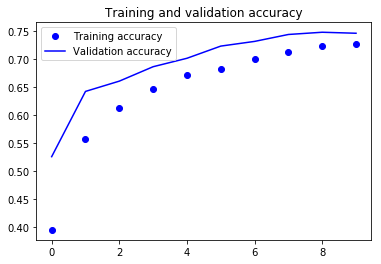

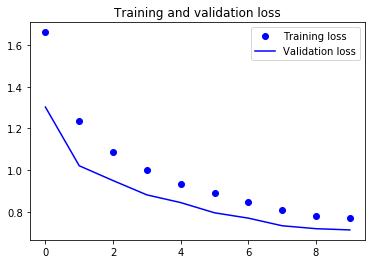

In [74]:
accuracy = ColorImag_model_dropout.history['acc']
val_accuracy = ColorImag_model_dropout.history['val_acc']
loss = ColorImag_model_dropout.history['loss']
val_loss = ColorImag_model_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [100]:
predicted_classes = ColorImag_model.predict(x_test)

In [101]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [102]:
predicted_classes.shape, y_test.shape

((10000,), (10000, 1))

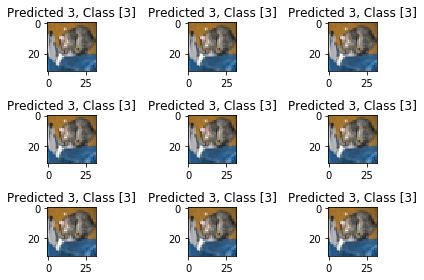

In [103]:
#correct = np.where(predicted_classes==y_test)[0]

#for i, correct in enumerate(correct[:9]):
 #   plt.subplot(3,3,i+1)
  #  plt.imshow(x_test[correct].reshape(32,32,-1), cmap='gray', interpolation='none')
   # plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    #plt.tight_layout()

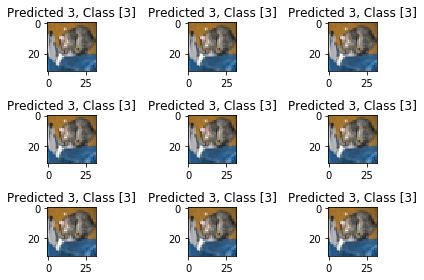

In [83]:
#incorrect = np.where(predicted_classes!=y_test)[0]

#for i, incorrect in enumerate(incorrect[:9]):
 #   plt.subplot(3,3,i+1)
  #  plt.imshow(x_test[incorrect].reshape(32,32,-1), cmap='gray', interpolation='none')
 #   plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
  #  plt.tight_layout()

In [104]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.31      0.90      0.46      1000
    Class 1       0.88      0.88      0.88      1000
    Class 2       0.84      0.45      0.59      1000
    Class 3       0.72      0.37      0.49      1000
    Class 4       0.77      0.62      0.69      1000
    Class 5       0.70      0.61      0.65      1000
    Class 6       0.88      0.73      0.80      1000
    Class 7       0.86      0.72      0.79      1000
    Class 8       0.92      0.80      0.85      1000
    Class 9       0.90      0.77      0.83      1000

avg / total       0.78      0.68      0.70     10000

